### IAPPT
Este archivo contiene la creacion y entrenamiento del modelo que usamos para determinar si la mano esta en posicion de piedra, papel o tijera.
Antes de nada ejecutaremos los imports necesarios.

In [118]:
import tensorflow as tf
import common.constants as const
import pandas as pd

# Keras 
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense


### Datasets
Primero hemos de entender que datos estamos pasando a nuestro modelo exactamente.
Mediante mediapie obtenemos una serie de puntos llamados landmarks, cada uno con un numero representandolo. 

![alt text](https://google.github.io/mediapipe/images/mobile/hand_landmarks.png)

Para obtener y guardar estos datos en el csv se encarga el ejecutable ```csv_generator.py```.
De todos estos landmarks solo usaremos estos: 0,6,8,10,12,14,16,18,20.

In [119]:
# A almacenamos los datos de los ficheros
data_train = pd.read_csv(const.TRAINING_CSV)
data_eval = pd.read_csv(const.EVALUATION_CSV)
data_train.sample(5)

,GESTO,WRIST_Y,WRIST_X,INDEX_FINGER_PIP_Y,INDEX_FINGER_PIP_X,INDEX_FINGER_TIP_Y,INDEX_FINGER_TIP_X,MIDDLE_FINGER_PIP_Y,MIDDLE_FINGER_PIP_X,MIDDLE_FINGER_TIP_Y,MIDDLE_FINGER_TIP_X,RING_FINGER_PIP_Y,RING_FINGER_PIP_X,RING_FINGER_TIP_Y,RING_FINGER_TIP_X,PINKY_FINGER_PIP_Y,PINKY_FINGER_PIP_X,PINKY_FINGER_TIP_Y,PINKY_FINGER_TIP_X
729,1,0.832705,0.435459,0.352794,0.607703,0.112611,0.624792,0.352675,0.503303,0.098365,0.535860,0.404979,0.393161,0.192138,0.432784,0.486190,0.281573,0.327257,0.313231
2029,0,0.634258,0.475262,0.349925,0.604041,0.291907,0.613099,0.329778,0.541373,0.295049,0.555251,0.338279,0.470331,0.298214,0.485929,0.375954,0.397393,0.341286,0.414339
1069,2,0.814044,0.435166,0.317014,0.615717,0.136898,0.643111,0.288134,0.464042,0.065704,0.445972,0.446139,0.368890,0.562781,0.403117,0.510620,0.303959,0.607387,0.340711
2268,0,0.718776,0.429148,0.336745,0.557805,0.334710,0.539876,0.320029,0.466269,0.337954,0.475121,0.340583,0.381357,0.360657,0.410415,0.401461,0.304105,0.406342,0.342156
202,1,0.771809,0.474900,0.367415,0.745598,0.169151,0.852461,0.304699,0.585697,0.079855,0.641463,0.331895,0.456014,0.106073,0.474304,0.370099,0.376928,0.205928,0.369053


Antes de usar el dataset eliminamos la columna que representa el resultado (Y) y la almacenamos en una variable.



In [120]:
train_y = to_categorical(data_train.pop('GESTO'))
eval_y = to_categorical(data_eval.pop('GESTO'))

###  Creando el modelo
Usaremos un modelo secuencial con cuatro capas ```1 input``` (la cual se crea de manera implicita), ```2 ocultas``` y ```1 output``` con 
Los parametros son estos:

- ```20/10/3``` representa la cantidad de nodos de esta capa.

- ```input_dim``` cantidad de parametros en la entrada.

- ```activation``` una funcion de activacion es la que opera los parametros del nodo, este parametro especifica que tipo de funcion usamos.

- ```optimizer``` los optimizadores son algoritmos usados para disminuir errores del modelo.

- ```loss``` funcion utilizada para cuantificar como de bueno es el desempeño del modelo, cuanto mas cercano es a 0 mejor.

- ```metrics``` es el objetivo del modelo (precision en este caso). 

In [121]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(20, activation='relu', input_dim=18))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Mostrar estructura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                380       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 623
Trainable params: 623
Non-trainable params: 0
_________________________________________________________________


### Entrenar el modelo

Aqui es donde empieza a aprender y clasificar.
Para ello se llama con el metodo ```fit()``` con los siguientes parametros:

- ```data_train``` es el dataset con los landmarks.

- ```train_y``` contiene la columna con el dato de gesto para que el modelo compruebe si acierta o falla.

- ```batch_size``` cantidad de filas de data_train que se procesan en cada paso.

- ```epochs``` numero de iteraciones sobre el dataset completo.

In [122]:
history = model.fit(data_train, train_y, batch_size=32, epochs=10)

Epoch 1/10
72/72 [==============================] - 0s 693us/step - loss: 1.0992 - accuracy: 0.4148
Epoch 2/10
72/72 [==============================] - 0s 793us/step - loss: 1.0356 - accuracy: 0.6577
Epoch 3/10
72/72 [==============================] - 0s 732us/step - loss: 0.9432 - accuracy: 0.8779
Epoch 4/10
72/72 [==============================] - 0s 718us/step - loss: 0.7781 - accuracy: 0.9284
Epoch 5/10
72/72 [==============================] - 0s 662us/step - loss: 0.5658 - accuracy: 0.9539
Epoch 6/10
72/72 [==============================] - 0s 676us/step - loss: 0.3865 - accuracy: 0.9613
Epoch 7/10
72/72 [==============================] - 0s 676us/step - loss: 0.2630 - accuracy: 0.9736
Epoch 8/10
72/72 [==============================] - 0s 704us/step - loss: 0.1906 - accuracy: 0.9780
Epoch 9/10
72/72 [==============================] - 0s 662us/step - loss: 0.1452 - accuracy: 0.9837
Epoch 10/10
72/72 [==============================] - 0s 676us/step - loss: 0.1173 - accuracy: 0.9890

### Desempeño del modelo durante entrenamiento

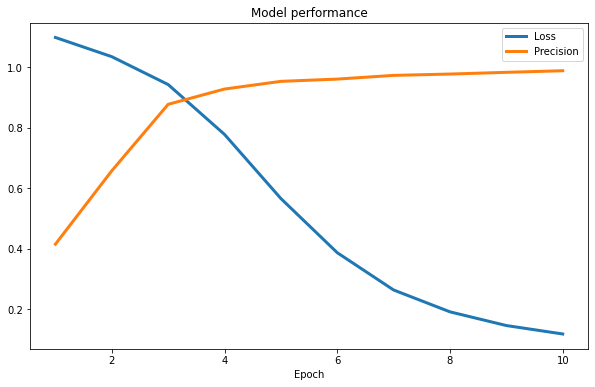

In [123]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Model performance')
plt.plot(np.arange(1, 11), history.history['loss'], label='Loss', lw=3)
plt.plot(np.arange(1, 11), history.history['accuracy'], label='Precision', lw=3)
plt.xlabel("Epoch")
plt.legend()

### Resultados
Para visualizar la precision del modelo mostrandole nuevos datos, ejecutamos esta celda.

In [124]:
scores = model.evaluate(data_eval, eval_y)
print(f'Precision del modelo: {scores[1]:.4f}')  

12/12 [==============================] - 0s 819us/step - loss: 0.1166 - accuracy: 0.9890
Precision del modelo: 0.9890


### Guardar el modelo
Si estamos contentos con el rendimiento lo podemos guardar de esta manera:

In [84]:
model.save('model\\gesture_classifier.h5')